<a href="https://colab.research.google.com/github/paralab/honor4471/blob/main/notebooks/Module_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2: Introduction to Python 

In this module, we will learn the basics of programming in Python. This will be done interactively, as we explore the [Stop and Frisk Data](https://www.nyclu.org/en/stop-and-frisk-data) from NYPD and try to recreate some of the plots and analysis from the NYCLU [2019 report](https://www.nyclu.org/sites/default/files/field_documents/20190314_nyclu_stopfrisk_singles.pdf). In order to be able to do this, there will be some parts of the code that you will simply be copying (initially). Don't worry too much about this initially, although a curious mind is always good. 

To make things simple, I have downloaded the data from [NYPD's website](https://www1.nyc.gov/site/nypd/stats/reports-analysis/stopfrisk.page) and saved them to my google drive under the `honor4471/nypd` directory. The files are a combination of Excel and CSV files (some of them zipped). I cleaned this up a bit, and my google drive looks like this. Its best to use your [gcloud account](https://gcloud.utah.edu/).

You need not follow the same convention, although some simplification will possibly help.

- My Drive
  - honor4471
    - nypd
      - sqf-2003.csv
      - sqf-2004.csv
      - ...
      - sqf-2016.csv
      - sqf-2017.xlsx
      - sqf-2018.xlsx
      - sqf-2019.xlsx

First, let us make sure we have access to our google drive within google colab. This requires the following code to be executed (use `Ctrl/Cmd+Enter` or click on the **play** button) and authenticated via google. 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
print(os.getcwd())
os.chdir('drive/MyDrive/honor4471')
print(os.getcwd())
print(os.listdir())

/content
/content/drive/MyDrive/honor4471
['nypd']


Now that our google drive is loaded (mounted), we can try to access the data. Now, it is not easy to load data from `xlsx` and `csv` files, and for this reason we will be using external packages to aid us. We will explore some of these packages in detail later, but for now, just follow the following examples. The first package is called [pandas](https://pandas.pydata.org/) that does a lot, but we will use it mainly for loading data (for now). 

Before we can use `pandas`, we need to let python know that we wish to use it, by using the `import` command. We will also need to use another package called [`numpy`](https://numpy.org/) that is needed by `pandas`. We will provide aliases for both of these so it is clear which commands are provided by these packages.

```python
import numpy as np
import pandas as pd
```

Lets try and recreate a simpler version of Figure 5 from the report using only the 2017 data. We will be using packages to help us visualize/plot data as well. Here are the relevant commands to load these packages.

```python
import seaborn as sns
sns.set_palette('Set2')
import matplotlib.pyplot as plt
%matplotlib inline
```

Let us load all our packages in a code cell now.

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_palette('Set2')
import matplotlib.pyplot as plt
%matplotlib inline

Let us start by using `pandas` to load the 2017 dataset. This can be done using the following command,

```python
data = pd.read_excel (r'/content/drive/My Drive/honor4471/nypd/sqf-2017.xlsx')
```



In [ ]:
data = pd.read_excel (r'nypd/sqf-2017.xlsx')

Now, in order to plot the race of the stops, we need to find this from our dataset. The file is basically a table, so we can look at the top row to determine which entry has the race.

In [ ]:
hdr = data.columns
print(hdr)

Index(['STOP_FRISK_ID', 'STOP_FRISK_DATE', 'STOP_FRISK_TIME', 'YEAR2',
       'MONTH2', 'DAY2', 'STOP_WAS_INITIATED', 'RECORD_STATUS_CODE',
       'ISSUING_OFFICER_RANK', 'ISSUING_OFFICER_COMMAND_CODE',
       'SUPERVISING_OFFICER_RANK', 'SUPERVISING_OFFICER_COMMAND_CODE',
       'SUPERVISING_ACTION_CORRESPONDING_ACTIVITY_LOG_ENTRY_REVIEWED',
       'LOCATION_IN_OUT_CODE', 'JURISDICTION_CODE', 'JURISDICTION_DESCRIPTION',
       'OBSERVED_DURATION_MINUTES', 'SUSPECTED_CRIME_DESCRIPTION',
       'STOP_DURATION_MINUTES', 'OFFICER_EXPLAINED_STOP_FLAG',
       'OFFICER_NOT_EXPLAINED_STOP_DESCRIPTION', 'OTHER_PERSON_STOPPED_FLAG',
       'SUSPECT_ARRESTED_FLAG', 'SUSPECT_ARREST_OFFENSE',
       'SUMMONS_ISSUED_FLAG', 'SUMMONS_OFFENSE_DESCRIPTION',
       'OFFICER_IN_UNIFORM_FLAG', 'ID_CARD_IDENTIFIES_OFFICER_FLAG',
       'SHIELD_IDENTIFIES_OFFICER_FLAG', 'VERBAL_IDENTIFIES_OFFICER_FLAG',
       'FRISKED_FLAG', 'SEARCHED_FLAG', 'OTHER_CONTRABAND_FLAG',
       'FIREARM_FLAG', 'KNIFE_CUTTER_FL

This shows there are 83 columns in the data and the headers are stored in the *variable* `hdr`. While we can go over these 83 names to spot the one containing the race, I am lazy. Let us see if we can (computationally) search for 'RACE' in the header. While there are more efficient ways of doing this, let us write some simple code to do this. You should at this point recall that this looks suspiciously close to us finding the minimum card in `selectionSort`.


In [ ]:
for col in data.columns:
  if 'RACE' in col:
    print(col)

SUSPECT_RACE_DESCRIPTION


OK! That looks like what we wanted. Note that we have used a simple `for` **loop** over the column names, and seen if any of the column names contains 'race'. I use capital letters as I remembered from the previous printing of column names that they were all in capitals. I could have instead looked in a case-agnostic fashion, but that is more complicated (for now) and I instead simplified the *model* and used the *a priori* knowledge I had. Similar to how we did with sort, we can determine the index as well.

In [ ]:
i = 0
for col in data.columns:
  if 'RACE' in col:
    race_index = i
    print(col)
  i = i+1
print('Race is in column: ', race_index)
print(hdr[race_index])

SUSPECT_RACE_DESCRIPTION
Race is in column:  65
SUSPECT_RACE_DESCRIPTION


Now we are getting somewhere. Let us see what the race column looks like.

In [ ]:
print(data['SUSPECT_RACE_DESCRIPTION'])

0                (null)
1                (null)
2                 WHITE
3        BLACK HISPANIC
4                 BLACK
              ...      
11624             BLACK
11625    WHITE HISPANIC
11626             BLACK
11627             BLACK
11628             WHITE
Name: SUSPECT_RACE_DESCRIPTION, Length: 11629, dtype: object


Ok, now looking at this and Figure 5, we would like to count all occurances of different races. There are several ways of doing this, but lets start with some basic and easy ways of doing this. (Note this is not the most efficient, but should be ok for our purposes). We will use a [Dictionary]() data structure to store our information. The 'key' will be the race name, and the value will be the count. A simpler version is the set, that only keeps *unique* items without any associated data. We can use this to determine which races are present, and making our count computations easier. 

In [ ]:
races = {"BLACK", "WHITE"}
for r in data['SUSPECT_RACE_DESCRIPTION']:
  races.add(r)
print(races)

{'MALE', 'WHITE', 'BLACK HISPANIC', 'WHITE HISPANIC', '(null)', 'AMER IND', 'ASIAN/PAC.ISL', 'BLACK'}


This looks mostly good (wrt Fig 5) except that *white hispanic* and *black hispanic* need to be added to both white/black and Latino. I am also not sure what Male is in this case, but lets leave it as is for now. We can remove *white hispanic* and *black hispanic* from `races` and add `Latino` instead. 

In [ ]:
races.remove('WHITE HISPANIC')
races.remove('BLACK HISPANIC')
races.add('LATINO')
print(races)

{'MALE', 'WHITE', '(null)', 'AMER IND', 'LATINO', 'ASIAN/PAC.ISL', 'BLACK'}


Ok, now lets go through the data, and count them as well. We can use our `races` variable to help us record these correctly, starting with creating a dictionary. 

In [ ]:
stops_by_race = {race: 0 for race in races}
print(stops_by_race)

{'MALE': 0, 'WHITE': 0, '(null)': 0, 'AMER IND': 0, 'LATINO': 0, 'ASIAN/PAC.ISL': 0, 'BLACK': 0}


In [ ]:
for r in data['SUSPECT_RACE_DESCRIPTION']:
  if 'HISPANIC' in r:
    stops_by_race['LATINO'] += 1
    if 'BLACK' in r: 
      stops_by_race['BLACK'] += 1
    else:
      stops_by_race['WHITE'] += 1
  else:
    stops_by_race[r] += 1

print(stops_by_race)

{'MALE': 7, 'WHITE': 3547, '(null)': 268, 'AMER IND': 9, 'LATINO': 3567, 'ASIAN/PAC.ISL': 206, 'BLACK': 7592}


Now, we can finally plot this as a pie chart. But before that, lets go and make `Male` also the same as `null`.

Lets plot using `matplotlib`


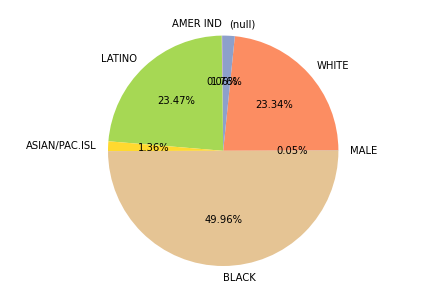

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(list(stops_by_race.values()), labels = stops_by_race.keys(),autopct='%1.2f%%')
plt.show()